# Emotion Recognition Using Navie Byes Limited Emotions

Training Accuracy: 0.9609
Test Accuracy: 0.8198
Test F1 Score: 0.8184
Test Confusion Matrix:
[[303  43   4  25]
 [  9 402  10  13]
 [  8  31 269  11]
 [ 27  63  12 191]]
Test Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.81      0.84       375
        fear       0.75      0.93      0.83       434
         joy       0.91      0.84      0.88       319
     sadness       0.80      0.65      0.72       293

    accuracy                           0.82      1421
   macro avg       0.83      0.81      0.81      1421
weighted avg       0.83      0.82      0.82      1421



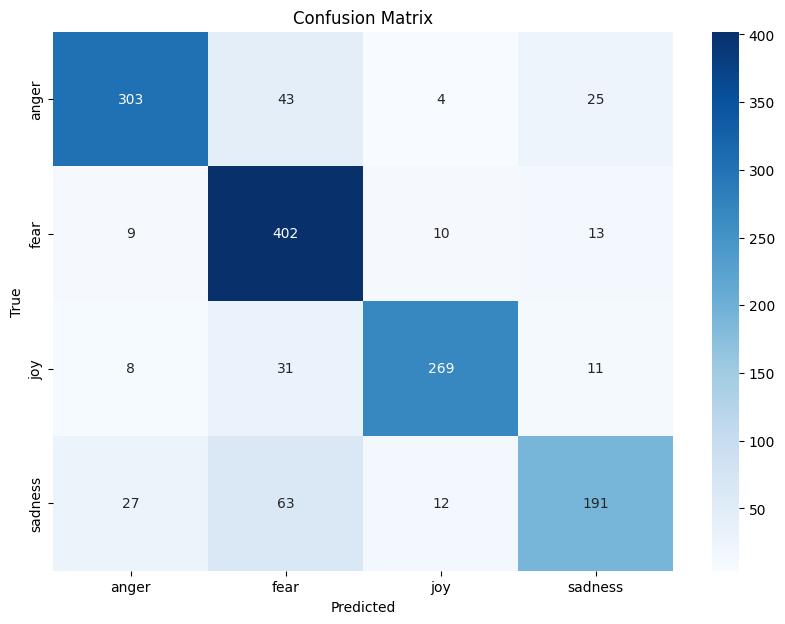

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Load the dataset with the correct encoding
df = pd.read_csv('AffectAlchemy.csv')  # Try different encodings if needed

# Split the dataset into features (X) and target (y)
X = df['text']
y = df['emotion']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test_counts)
y_pred_train = model.predict(X_train_counts)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics
print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')
print('Test Confusion Matrix:')
print(conf_matrix)
print('Test Classification Report:')
print(classification_report(y_test, y_pred_test))

# To display the confusion matrix visually (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Naive Bayes + Text Cleaning

Epoch 1/5
178/178 [==============================] - 63s 303ms/step - loss: 0.4423 - accuracy: 0.9215 - val_loss: 0.6491 - val_accuracy: 0.8213
Epoch 2/5
178/178 [==============================] - 46s 256ms/step - loss: 0.1640 - accuracy: 0.9592 - val_loss: 0.6182 - val_accuracy: 0.8220
Epoch 3/5
178/178 [==============================] - 46s 258ms/step - loss: 0.1511 - accuracy: 0.9623 - val_loss: 0.6221 - val_accuracy: 0.8255
Epoch 4/5
178/178 [==============================] - 48s 268ms/step - loss: 0.1260 - accuracy: 0.9616 - val_loss: 0.6629 - val_accuracy: 0.8262
Epoch 5/5
45/45 [==============================] - 4s 63ms/step
Training Accuracy: 0.9660
Test Accuracy: 0.8283
Test F1 Score: 0.8276
Test Confusion Matrix:
[[317  28   4  26]
 [ 16 389   9  20]
 [ 12  28 266  13]
 [ 28  49  11 205]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       375
           1       0.79      0.90      0.84       434

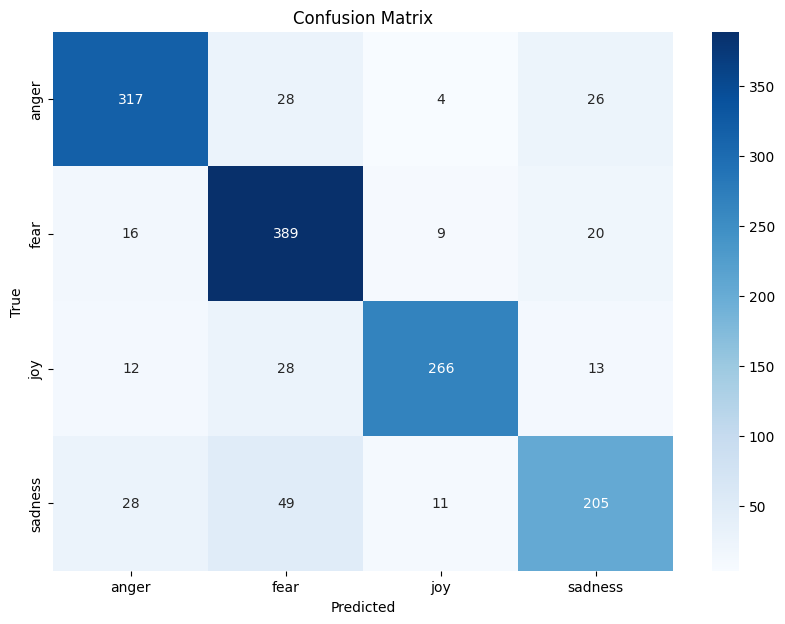

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset with the correct encoding
df = pd.read_csv('AffectAlchemy.csv')  # Try different encodings if needed

# Split the dataset into features (X) and target (y)
X = df['text']
y = df['emotion']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes feature extraction
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_counts, y_train)

# Make predictions on the training and test set with Naive Bayes
nb_train_predictions = nb_model.predict_proba(X_train_counts)
nb_test_predictions = nb_model.predict_proba(X_test_counts)

# Prepare text data for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the LSTM input
input_text = Input(shape=(max_sequence_length,))
embedding = Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length)(input_text)
lstm = LSTM(128, return_sequences=True)(embedding)
lstm = Dropout(0.5)(lstm)
lstm = LSTM(64)(lstm)
lstm = Dropout(0.5)(lstm)
lstm_output = Dense(64, activation='relu')(lstm)

# Define the Naive Bayes input
input_nb = Input(shape=(nb_train_predictions.shape[1],))
nb_output = Dense(64, activation='relu')(input_nb)

# Concatenate the outputs of LSTM and Naive Bayes
combined = concatenate([lstm_output, nb_output])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.5)(combined)
final_output = Dense(len(label_encoder.classes_), activation='softmax')(combined)

# Define the model
model = Model(inputs=[input_text, input_nb], outputs=final_output)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit([X_train_pad, nb_train_predictions], y_train, epochs=5, batch_size=32, validation_data=([X_test_pad, nb_test_predictions], y_test))

# Evaluate the model
train_loss, train_accuracy = model.evaluate([X_train_pad, nb_train_predictions], y_train)
test_loss, test_accuracy = model.evaluate([X_test_pad, nb_test_predictions], y_test)

# Make predictions on the test set with the hybrid model
y_pred_test = np.argmax(model.predict([X_test_pad, nb_test_predictions]), axis=1)

# Evaluate the model
f1_test = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')
print('Test Confusion Matrix:')
print(conf_matrix)
print('Test Classification Report:')
print(classification_report(y_test, y_pred_test))

# To display the confusion matrix visually (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
